c:\Users\thong\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\Users\thong\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


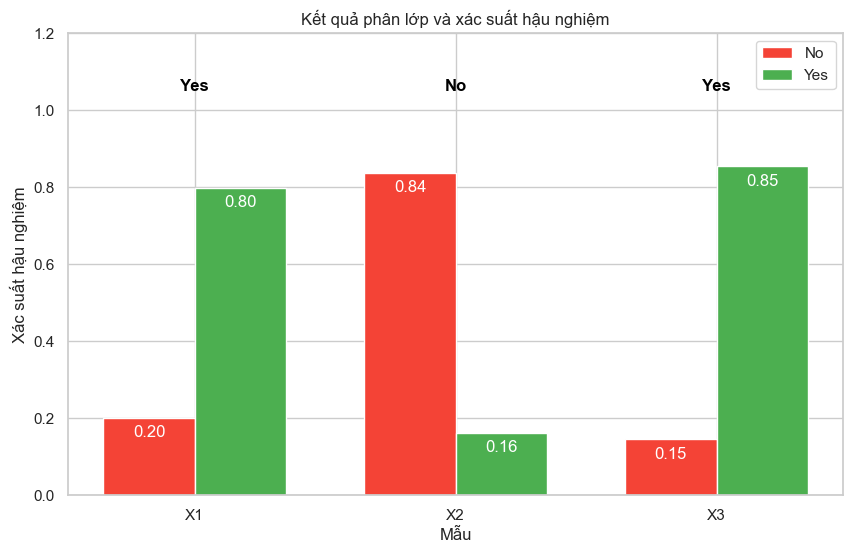

In [25]:
# Import các thư viện cần thiết cho visualization
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới file Excel
file_path = 'data - lab 5 - b6.xlsx'

# 1. Đọc và chuẩn bị dữ liệu
def load_and_prepare_data(file_path):
    data = pd.read_excel(file_path, sheet_name='Sheet1')
    label_encoders = {}
    
    # Mã hóa các cột dạng phân loại
    for column in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Ball']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    
    X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']]
    y = data['Play Ball']
    
    return X, y, label_encoders

# 2. Huấn luyện mô hình Naïve Bayes
def train_naive_bayes_model(X, y):
    model = CategoricalNB()
    model.fit(X, y)
    return model

# 3. Mã hóa mẫu mới bằng LabelEncoder
def encode_samples(samples, label_encoders, feature_columns):
    encoded_samples = []
    for sample in samples:
        encoded_sample = [label_encoders[column].transform([value])[0] for column, value in zip(feature_columns, sample)]
        encoded_samples.append(encoded_sample)
    return encoded_samples

# 4. Dự đoán lớp cho các mẫu mới
def predict_samples(model, encoded_samples, label_encoder_target):
    predictions = model.predict(encoded_samples)
    decoded_predictions = label_encoder_target.inverse_transform(predictions)
    return decoded_predictions

# 5. Visualize kết quả bằng biểu đồ cột, bao gồm cả xác suất hậu nghiệm
def visualize_predictions_with_posteriors(samples, probabilities, predictions):
    labels = [f"X{i+1}" for i in range(len(samples))]
    yes_probs = [prob[1] for prob in probabilities]  # Xác suất cho lớp "Yes"
    no_probs = [prob[0] for prob in probabilities]   # Xác suất cho lớp "No"

    # Thiết lập biểu đồ
    x = np.arange(len(samples))  # Vị trí của các cột
    width = 0.35  # Độ rộng của các cột

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Biểu đồ cột cho xác suất của lớp "No"
    bars1 = ax.bar(x - width/2, no_probs, width, label='No', color='#F44336')
    # Biểu đồ cột cho xác suất của lớp "Yes"
    bars2 = ax.bar(x + width/2, yes_probs, width, label='Yes', color='#4CAF50')
    
    # Đặt nhãn và tiêu đề
    ax.set_xlabel('Mẫu')
    ax.set_ylabel('Xác suất hậu nghiệm')
    ax.set_title('Kết quả phân lớp và xác suất hậu nghiệm')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Hiển thị giá trị xác suất trên các cột
    for bar, prob in zip(bars1, no_probs):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{prob:.2f}', ha='center', color='white')
    for bar, prob in zip(bars2, yes_probs):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{prob:.2f}', ha='center', color='white')
    
    # Hiển thị dự đoán lớp trên đầu các cột
    for i, prediction in enumerate(predictions):
        ax.text(i, 1.05, prediction, ha='center', color='black', weight='bold')
    
    plt.ylim(0, 1.2)  # Giới hạn trục y để dễ nhìn hơn
    plt.show()

# Chạy các bước của quy trình
# Tải và chuẩn bị dữ liệu
X, y, label_encoders = load_and_prepare_data(file_path)

# Huấn luyện mô hình
model = train_naive_bayes_model(X, y)

# Định nghĩa các mẫu cần dự đoán
samples = [
    ['Rainy', 'Cool', 'Normal', 'Weak'],   # X1
    ['Rainy', 'Hot', 'High', 'Strong'],    # X2
    ['Sunny', 'Mild', 'Normal', 'Weak']    # X3
]

# Mã hóa các mẫu mới
encoded_samples = encode_samples(samples, label_encoders, X.columns)

# Dự đoán xác suất hậu nghiệm và giải mã kết quả
probabilities, predictions = predict_posteriors(model, encoded_samples, label_encoders['Play Ball'])

# Visualize kết quả với xác suất hậu nghiệm
visualize_predictions_with_posteriors(samples, probabilities, predictions)


c:\Users\thong\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
c:\Users\thong\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


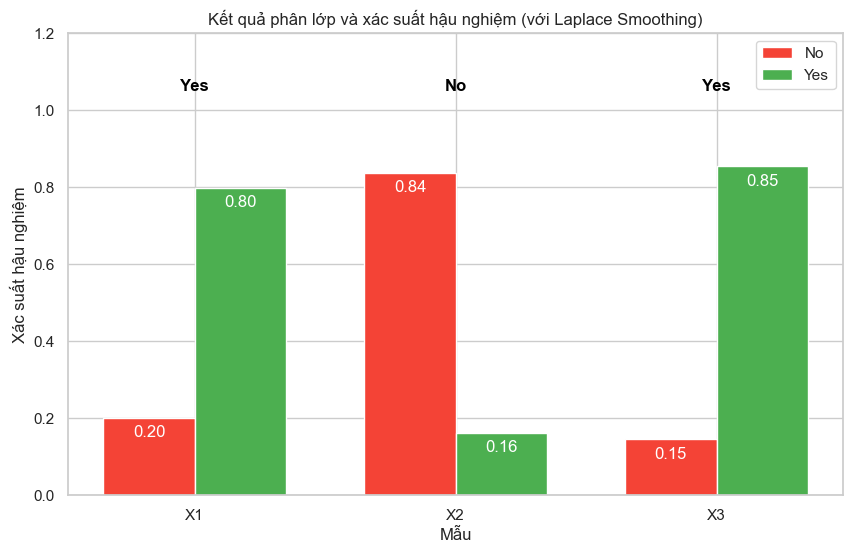

In [26]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới file Excel
file_path = 'data - lab 5 - b6.xlsx'

# 1. Đọc và chuẩn bị dữ liệu
def load_and_prepare_data(file_path):
    data = pd.read_excel(file_path, sheet_name='Sheet1')
    label_encoders = {}
    
    # Mã hóa các cột dạng phân loại
    for column in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Ball']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    
    X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']]
    y = data['Play Ball']
    
    return X, y, label_encoders

# 2. Huấn luyện mô hình Naïve Bayes với Laplace Smoothing (alpha > 0)
def train_naive_bayes_model(X, y, alpha=1.0):
    model = CategoricalNB(alpha=alpha)  # Áp dụng Laplace Smoothing với alpha
    model.fit(X, y)
    return model

# 3. Mã hóa mẫu mới bằng LabelEncoder
def encode_samples(samples, label_encoders, feature_columns):
    encoded_samples = []
    for sample in samples:
        encoded_sample = [label_encoders[column].transform([value])[0] for column, value in zip(feature_columns, sample)]
        encoded_samples.append(encoded_sample)
    return encoded_samples

# 4. Dự đoán xác suất hậu nghiệm cho các mẫu mới
def predict_posteriors(model, encoded_samples, label_encoder_target):
    probabilities = model.predict_proba(encoded_samples)
    predictions = model.predict(encoded_samples)
    decoded_predictions = label_encoder_target.inverse_transform(predictions)
    return probabilities, decoded_predictions

# 5. Visualize kết quả bằng biểu đồ cột, bao gồm cả xác suất hậu nghiệm
def visualize_predictions_with_posteriors(samples, probabilities, predictions):
    labels = [f"X{i+1}" for i in range(len(samples))]
    yes_probs = [prob[1] for prob in probabilities]  # Xác suất cho lớp "Yes"
    no_probs = [prob[0] for prob in probabilities]   # Xác suất cho lớp "No"

    # Thiết lập biểu đồ
    x = np.arange(len(samples))  # Vị trí của các cột
    width = 0.35  # Độ rộng của các cột

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Biểu đồ cột cho xác suất của lớp "No"
    bars1 = ax.bar(x - width/2, no_probs, width, label='No', color='#F44336')
    # Biểu đồ cột cho xác suất của lớp "Yes"
    bars2 = ax.bar(x + width/2, yes_probs, width, label='Yes', color='#4CAF50')
    
    # Đặt nhãn và tiêu đề
    ax.set_xlabel('Mẫu')
    ax.set_ylabel('Xác suất hậu nghiệm')
    ax.set_title('Kết quả phân lớp và xác suất hậu nghiệm (với Laplace Smoothing)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Hiển thị giá trị xác suất trên các cột
    for bar, prob in zip(bars1, no_probs):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{prob:.2f}', ha='center', color='white')
    for bar, prob in zip(bars2, yes_probs):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{prob:.2f}', ha='center', color='white')
    
    # Hiển thị dự đoán lớp trên đầu các cột
    for i, prediction in enumerate(predictions):
        ax.text(i, 1.05, prediction, ha='center', color='black', weight='bold')
    
    plt.ylim(0, 1.2)  # Giới hạn trục y để dễ nhìn hơn
    plt.show()

# Chạy các bước của quy trình
# Tải và chuẩn bị dữ liệu
X, y, label_encoders = load_and_prepare_data(file_path)

# Huấn luyện mô hình với Laplace Smoothing (alpha = 1.0)
model = train_naive_bayes_model(X, y, alpha=1.0)

# Định nghĩa các mẫu cần dự đoán
samples = [
    ['Rainy', 'Cool', 'Normal', 'Weak'],   # X1
    ['Rainy', 'Hot', 'High', 'Strong'],    # X2
    ['Sunny', 'Mild', 'Normal', 'Weak']    # X3
]

# Mã hóa các mẫu mới
encoded_samples = encode_samples(samples, label_encoders, X.columns)

# Dự đoán xác suất hậu nghiệm và giải mã kết quả
probabilities, predictions = predict_posteriors(model, encoded_samples, label_encoders['Play Ball'])

# Visualize kết quả với xác suất hậu nghiệm
visualize_predictions_with_posteriors(samples, probabilities, predictions)
